# Lasso and Elastic Net Regularization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, ElasticNet
import numpy as np

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/dataRidge.xlsx", sheet_name='data')
X_train = pd.read_excel("./data/dataRidge.xlsx", sheet_name='XTrain')
X_test = pd.read_excel("./data/dataRidge.xlsx", sheet_name='XTest')
y_train = pd.read_excel("./data/dataRidge.xlsx", sheet_name='yTrain')
y_test = pd.read_excel("./data/dataRidge.xlsx", sheet_name='yTest')
data.head()

,X1,X2,Y
0,0.0208,19.5891,1.8531
1,0.0815,20.5700,2.6608
2,0.4559,19.5046,2.4986
3,0.3005,19.1038,1.6348
4,0.0502,19.2186,3.1839


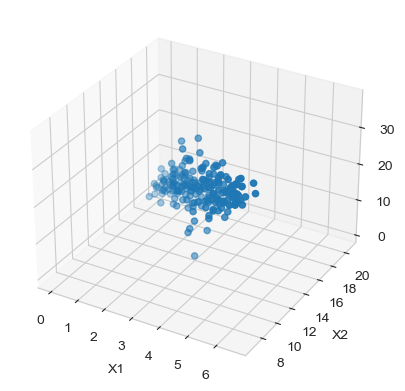

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data.X1, data.X2, data.Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Lasso

We can use the [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn-linear-model-lasso) class to perform lasso regression. Lasso uses a different scaling for alpha. We can scale alpha by the number of observations to have the same interpretation as for Ridge.

In [4]:
alphas = np.arange(1, 101) / len(y_train.Y)
coefs = []
intercepts = []
for a in alphas:
    regressor = Lasso(alpha=a)
    regressor.fit(X_train, y_train)
    coefs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

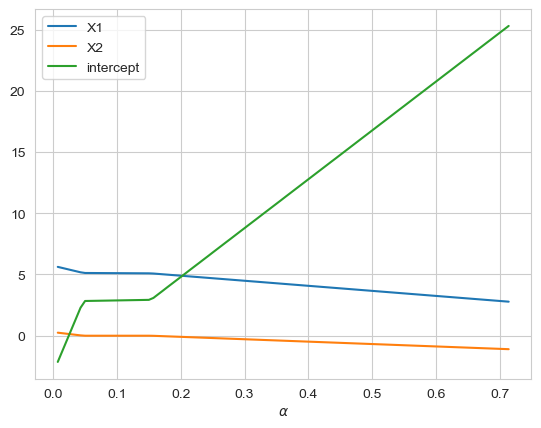

In [5]:
plt.figure()
plt.plot(alphas, np.concatenate(coefs).reshape(-1, 2))
plt.plot(alphas, intercepts)
plt.legend(["X1", "X2", "intercept"])
plt.xlabel("$\\alpha$")
plt.show()

We can notice that once the coefficient of X2 reaches zero, it remains zero for several alpha values, which means the algorithm has identified X2 as a redundant predictor. We can use the MSE to evaluate its impact on the fit.

Minimum MSE:
 MSE = 12.987927063097692 at lambda = 0.7142857142857143


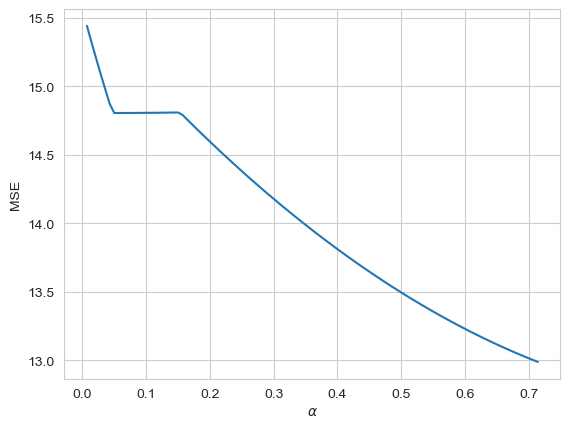

In [6]:
y_pred = np.array(intercepts).T + X_test.dot(np.concatenate(coefs).reshape(-1, 2).T)
error = y_pred - y_test.Y.to_numpy().reshape(-1, 1)
MSE = np.mean(error**2, axis=0)
idx = MSE.argmin()
print(f"Minimum MSE:\n MSE = {MSE[idx]} at lambda = {alphas[idx]}")

plt.figure()
plt.plot(alphas, MSE)
plt.xlabel("$\\alpha$")
plt.ylabel("MSE")
plt.show()

## ElasticNet

Now let's hav a look at how the [ElasticNet()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn-linear-model-elasticnet) works on the data.

In [7]:
alphas = np.arange(1, 101) / len(y_train.Y)
coefs = []
intercepts = []
for a in alphas:
    regressor = ElasticNet(alpha=a, l1_ratio=0.4)
    regressor.fit(X_train, y_train)
    coefs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

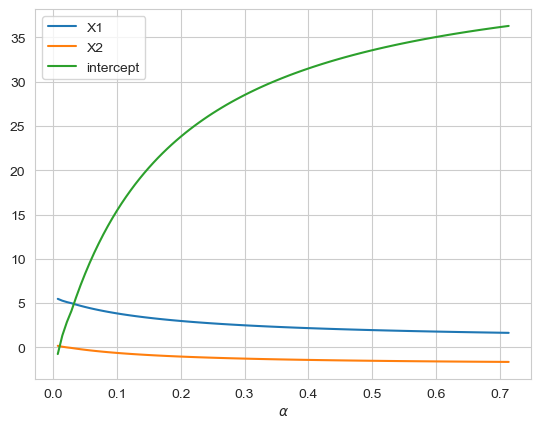

In [8]:
plt.figure()
plt.plot(alphas, np.concatenate(coefs).reshape(-1, 2))
plt.plot(alphas, intercepts)
plt.legend(["X1", "X2", "intercept"])
plt.xlabel("$\\alpha$")
plt.show()

Minimum MSE:
 MSE = 12.67322312535608 at alpha = 0.6285714285714286


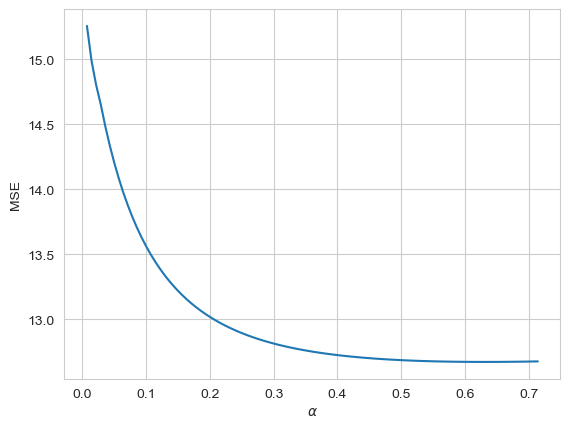

In [9]:
y_pred = np.array(intercepts).T + X_test.dot(np.concatenate(coefs).reshape(-1, 2).T)
error = y_pred - y_test.Y.to_numpy().reshape(-1, 1)
MSE = np.mean(error**2, axis=0)
idx = MSE.argmin()
print(f"Minimum MSE:\n MSE = {MSE[idx]} at alpha = {alphas[idx]}")

plt.figure()
plt.plot(alphas, MSE)
plt.xlabel("$\\alpha$")
plt.ylabel("MSE")
plt.show()